In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

listings_url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/data/listings.csv.gz'
neighbourhoods_url = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/neighbourhoods.csv'

cols = ['room_type',
        'price',
        'accommodates',
        'bedrooms',
        'beds',
        'amenities'
       ]

listings_df = pd.read_csv(listings_url, low_memory=False, usecols=cols, compression='gzip')

print(listings_df['room_type'].unique())
print(listings_df['bedrooms'].unique())
listings_df.info()

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
[nan  1.  2.  4.  3.  5.  8.  6.  7. 10. 11.  9. 13. 12. 16.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   room_type     38277 non-null  object 
 1   accommodates  38277 non-null  int64  
 2   bedrooms      34302 non-null  float64
 3   beds          35872 non-null  float64
 4   amenities     38277 non-null  object 
 5   price         38277 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [212]:
# Hinnan muuttaminen objectista floatiksi. Alkuperäistä merkkijonoa täytyi käsitellä hieman regexin avulla
listings_df['price'] = listings_df['price'].str.replace(r'[$,]', '')
listings_df['price'] = pd.to_numeric(listings_df['price'])

listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   room_type     38277 non-null  object 
 1   accommodates  38277 non-null  int64  
 2   bedrooms      34302 non-null  float64
 3   beds          35872 non-null  float64
 4   amenities     38277 non-null  object 
 5   price         38277 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.8+ MB


In [213]:
print(listings_df.isnull().sum())

room_type          0
accommodates       0
bedrooms        3975
beds            2405
amenities          0
price              0
dtype: int64


In [214]:
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(listings_df['bedrooms'].median())
listings_df['beds'] = listings_df['beds'].fillna(listings_df['beds'].median())
print(listings_df.isnull().sum())

room_type       0
accommodates    0
bedrooms        0
beds            0
amenities       0
price           0
dtype: int64


In [215]:
entire_home = listings_df.loc[:,['price', 'accommodates', 'bedrooms', 'beds', 'room_type']]
entire_home = entire_home[ entire_home['room_type'] == 'Entire home/apt' ]

private_room = listings_df.loc[:,['price', 'accommodates', 'bedrooms', 'beds', 'room_type']]
private_room = private_room[ private_room['room_type'] == 'Private room' ]

hotel_room = listings_df.loc[:,['price', 'accommodates', 'bedrooms', 'beds', 'room_type']]
hotel_room = hotel_room[ hotel_room['room_type'] == 'Hotel room' ]

shared_room = listings_df.loc[:,['price', 'accommodates', 'bedrooms', 'beds', 'room_type']]
shared_room = shared_room[ shared_room['room_type'] == 'Shared room' ]


In [216]:
avg_price_entire = entire_home['price'].mean()
avg_price_private = private_room['price'].mean()
avg_price_hotel = hotel_room['price'].mean()
avg_price_shared = shared_room['price'].mean()

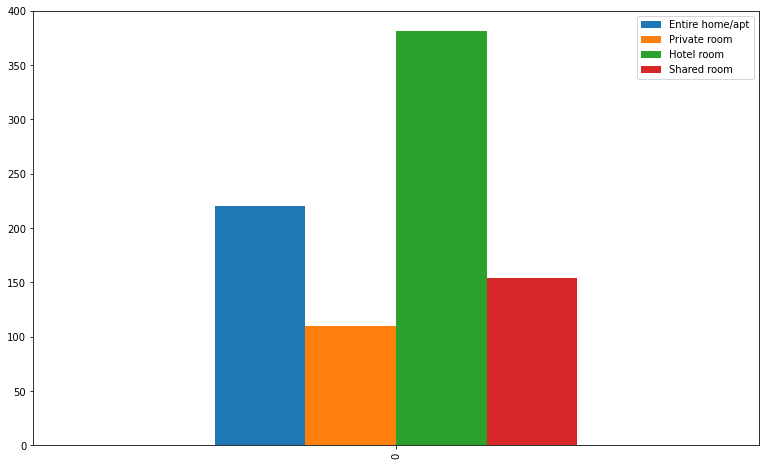

In [217]:
# Keskimääräisen hinnan kuvaaminen
avg_plot = pd.DataFrame([[avg_price_entire, avg_price_private, avg_price_hotel, avg_price_shared]])
avg_plot.columns = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
avg_plot.plot.bar(figsize=(13,8))
plt.show()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'accommodates'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>]], dtype=object)

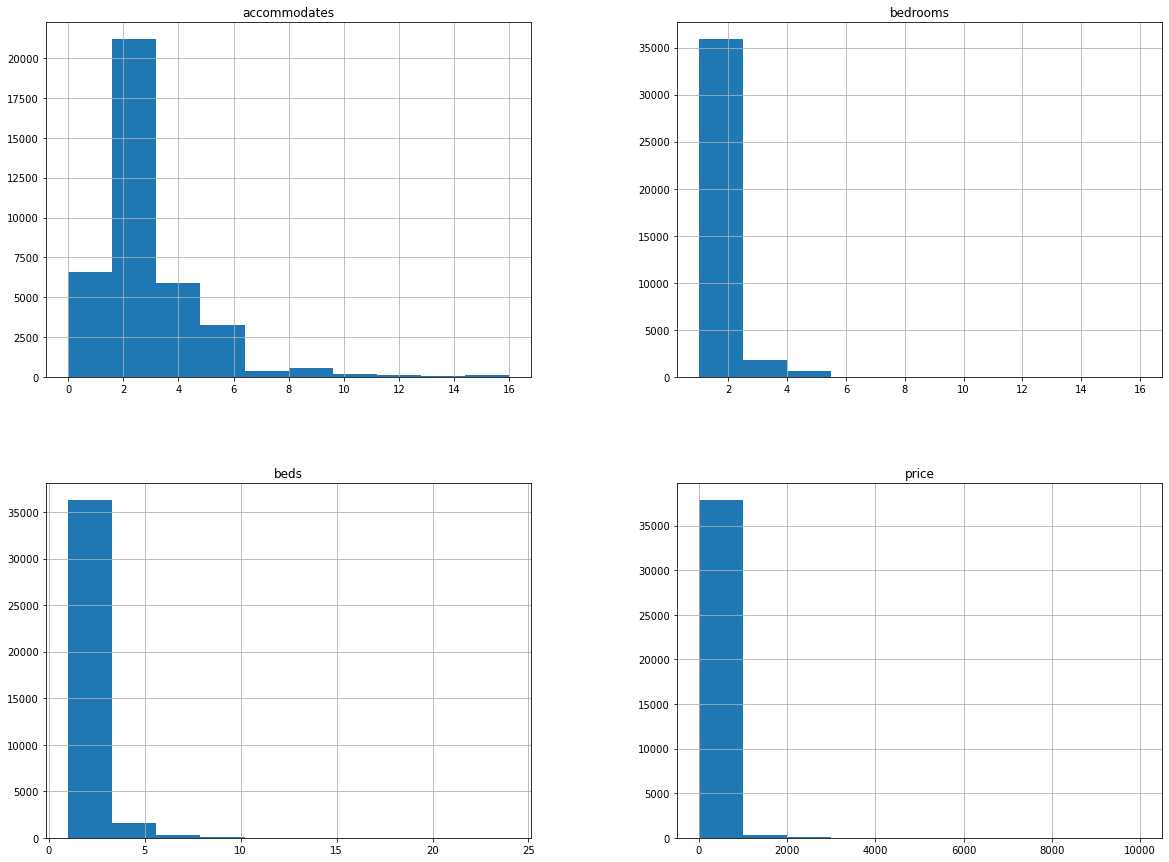

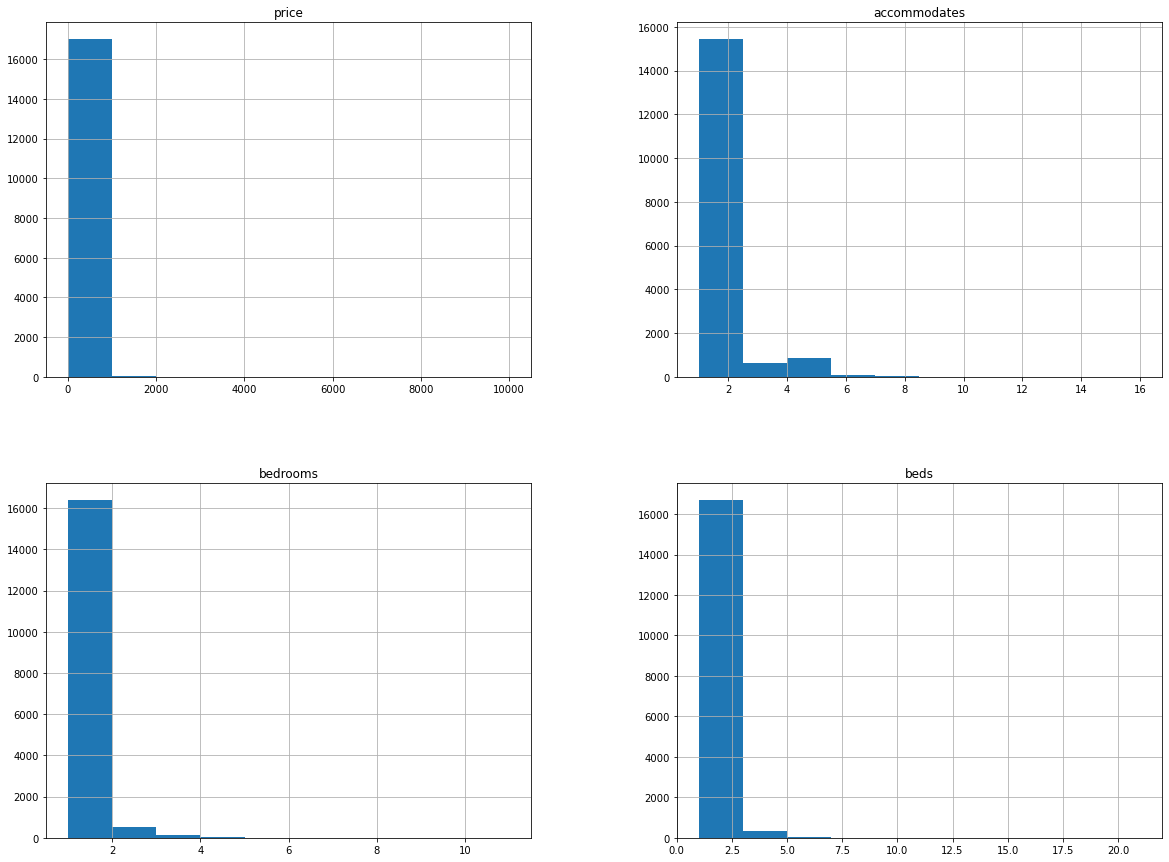

In [218]:
# Näytetään datasta, paljonko asukkaita, makuuhuoneita ja sänkyjä on
listings_df.hist(figsize=(20,15))
private_room.hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

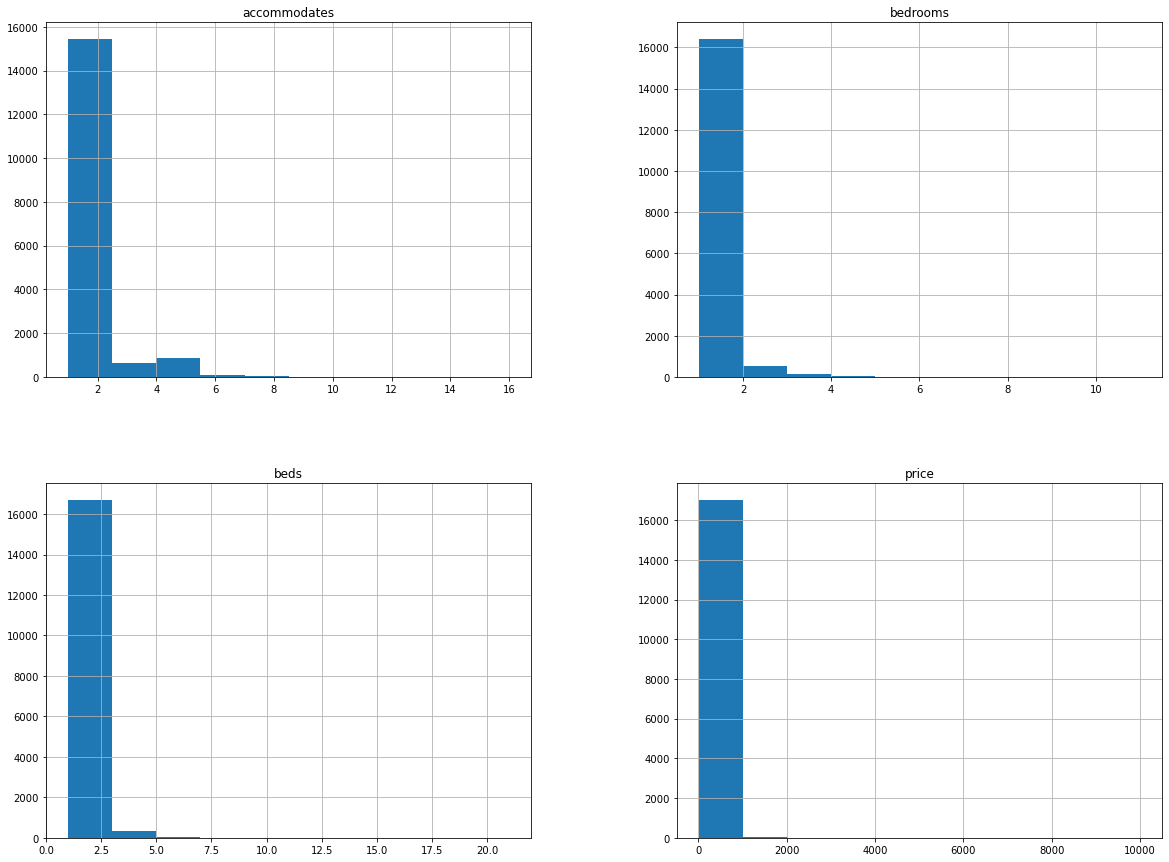

In [206]:
private_room = listings_df[ listings_df['room_type'] == 'Private room' ]
private_room.hist(figsize=(20,15))

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

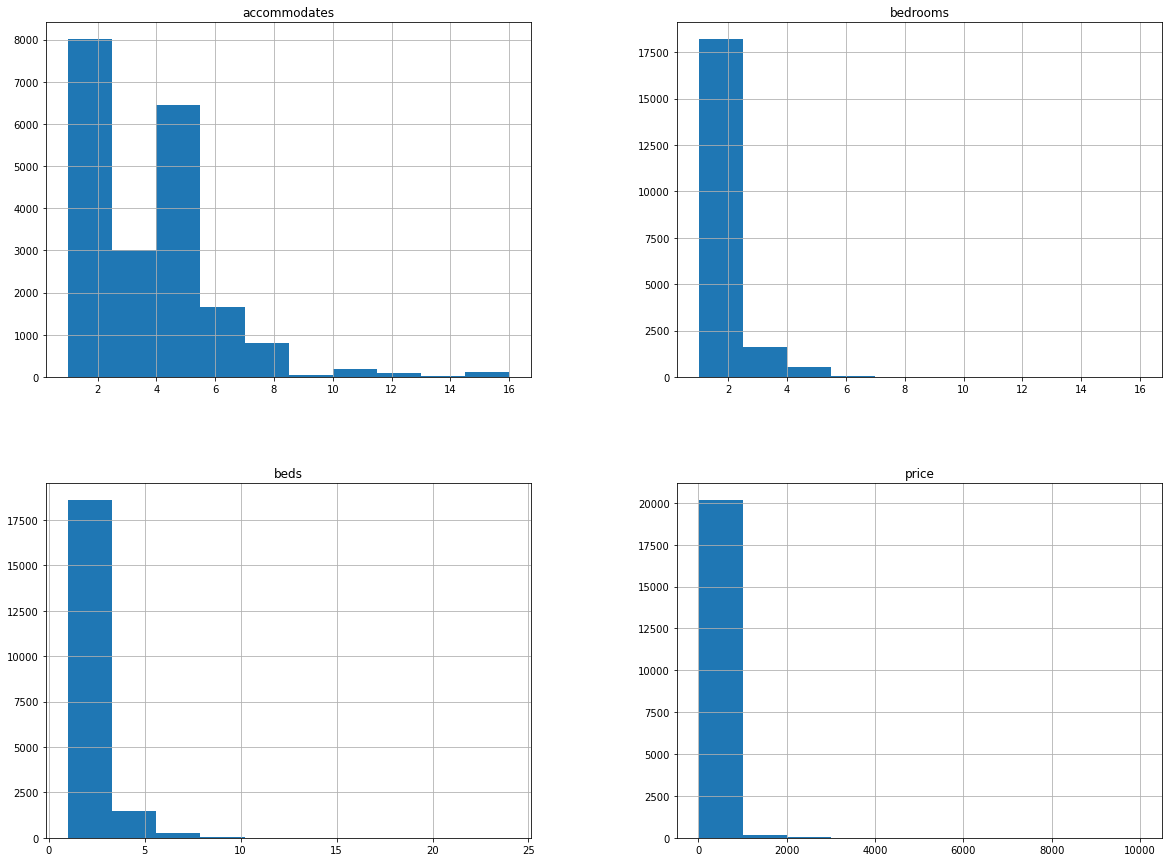

In [219]:
private_room = listings_df[ listings_df['room_type'] == 'Entire home/apt']
private_room.hist(figsize=(20,15))

In [220]:
# KONEOPPIMINEN
listings_df.corr()['accommodates']

accommodates    1.000000
bedrooms        0.707011
beds            0.739196
price           0.308026
Name: accommodates, dtype: float64

In [221]:
listings_df.corr()['price']

accommodates    0.308026
bedrooms        0.250256
beds            0.232991
price           1.000000
Name: price, dtype: float64

In [222]:
listings_df.corr()['bedrooms']

accommodates    0.707011
bedrooms        1.000000
beds            0.734448
price           0.250256
Name: bedrooms, dtype: float64

Text(0, 0.5, 'Hinta $')

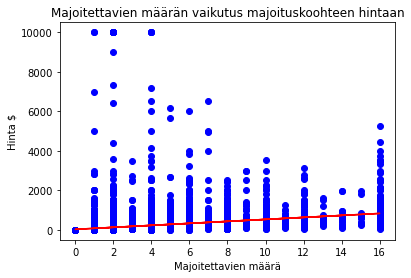

In [227]:
x = listings_df['accommodates'].values[:,np.newaxis]
y = listings_df['price']

classifier = linear_model.LinearRegression().fit(x,y)

plt.scatter(x,y,color='blue')
plt.plot(x, classifier.predict(x), c='red')
plt.title('Majoitettavien määrän vaikutus majoituskoohteen hintaan')
plt.xlabel('Majoitettavien määrä')
plt.ylabel('Hinta $')

Text(0, 0.5, 'Hinta $')

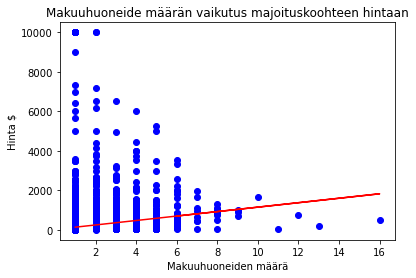

In [228]:
x = listings_df['bedrooms'].values[:,np.newaxis]
y = listings_df['price']

classifier = linear_model.LinearRegression().fit(x,y)

plt.scatter(x,y,color='blue')
plt.plot(x, classifier.predict(x), c='red')
plt.title('Makuuhuoneide määrän vaikutus majoituskoohteen hintaan')
plt.xlabel('Makuuhuoneiden määrä')
plt.ylabel('Hinta $')